In [86]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import requests
import time
from datetime import datetime

from config import g_key
url = 'https://www.googleapis.com/youtube/v3/videos?id=TajZ3_uqlbU&key='+g_key+'&part=snippet,contentDetails,statistics,status'

from citipy import citipy

import timeit

In [87]:
# Read csv files with urls for videos with pandas. File 2 does not contain outlier data.
videos = pd.read_csv('ConnorDawg.csv')
videos2 = pd.read_csv('ConnorDawg2.csv')

# Create a video list 
videos_list = []
videos_list = videos['Videos'].tolist()

# Create a video list without the outlier video (3.6M views)
videos_list2 = []
videos_list2 = videos2['Videos'].tolist()

In [88]:
# For each video request json and store value of viewCount into variable,
# append to view_counts list
view_counts = []
for u_key in videos_list:
    url = 'https://www.googleapis.com/youtube/v3/videos?id='+u_key+'&key='+g_key+'&part=snippet,contentDetails,statistics,status'
    video_response = requests.get(url)
    video_json = video_response.json()
    try:
        counts = video_json['items'][0]['statistics']['viewCount']
        counts = int(counts)
    except KeyError:
        continue
    view_counts.append(counts)  
print(view_counts)

[288392, 779187, 398367, 340920, 814061, 367318, 950693, 284266, 677694, 288940, 602448, 369307, 283442, 295754, 313441, 605387, 231115, 432188, 288993, 443688, 426387, 345632, 432452, 255434, 300368, 1566989, 232273, 1697885, 511368, 225091, 130755, 265637, 483664, 303718, 256069, 149133, 864385, 283127, 1173413, 256474, 378525, 933617, 857695, 192953, 239781, 223772, 1031071, 297460, 425244, 191574, 270563, 986314, 216709, 1390563, 685155, 593634, 591347, 752834, 224300, 965147, 479225, 622219, 301064, 536636, 308713, 3436982, 309595, 796525, 445958, 989864, 248834, 1337754, 365778, 1500796, 909145, 1873269, 646608, 703420, 687832, 622580, 592624, 243597, 253161, 640336, 257885, 444232, 407346, 250644, 251625, 605233, 329312, 1415940, 464676, 407994, 322547, 937491, 250031, 548897, 264115, 521022, 1193573, 261695, 964302, 538258, 396606, 599692, 1323556, 649376, 364716, 871607, 447331, 333383, 492509, 834779, 728216, 711562, 1088975, 1157605, 202295, 465470, 679138, 416687, 868159, 4

In [90]:
# For each video request json and store value of viewCount into variable,
# append to view_counts list
view_counts2 = []
for u_key in videos_list2:
    url = 'https://www.googleapis.com/youtube/v3/videos?id='+u_key+'&key='+g_key+'&part=snippet,contentDetails,statistics,status'
    video_response = requests.get(url)
    video_json = video_response.json()
    try:
        counts2 = video_json['items'][0]['statistics']['viewCount']
        counts2 = int(counts2)
    except KeyError:
        continue
    view_counts2.append(counts2)  
print(view_counts2)

[288392, 779187, 398367, 340920, 814061, 367318, 950693, 284266, 677694, 288940, 602448, 369307, 283442, 295754, 313441, 605387, 231115, 432188, 288993, 443688, 426387, 345632, 432452, 255434, 300368, 1566989, 232273, 1697887, 511368, 225091, 130755, 265637, 483664, 303718, 256069, 149133, 864385, 283127, 1173413, 256474, 378525, 933617, 857697, 192953, 239781, 223772, 1031071, 297460, 425244, 191574, 270563, 986314, 216709, 1390563, 685155, 593634, 591347, 752834, 224300, 965147, 479225, 622219, 301064, 536636, 308713, 309595, 796525, 445958, 989864, 248834, 1337754, 365778, 1500796, 909145, 1873274, 646608, 703420, 687832, 622580, 592624, 243597, 253161, 640336, 257885, 444232, 407346, 250644, 251625, 605233, 329312, 1415940, 464676, 407994, 322547, 937491, 250031, 548897, 264115, 521025, 1193573, 261695, 964302, 538258, 396606, 599692, 1323556, 649376, 364716, 871607, 447331, 333383, 492509, 834779, 728216, 711562, 1088975, 1157605, 202295, 465470, 679138, 416687, 868159, 447616, 43

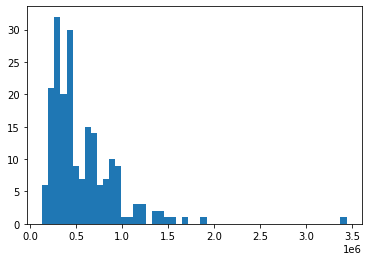

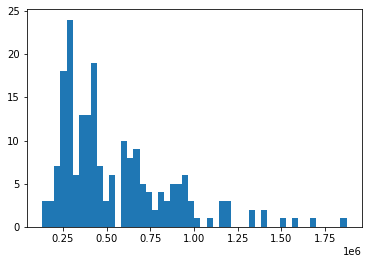

In [91]:
# Show distribution of viewCounts with Histograms
plt.hist(view_counts, bins = 50)
plt.show()

plt.hist(view_counts2,bins = 50)
plt.show()

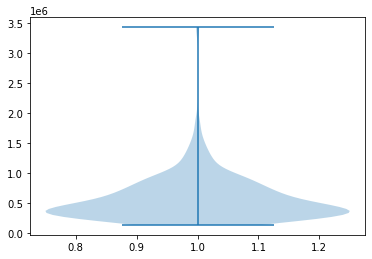

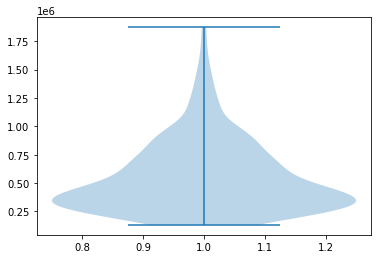

In [93]:
# Show distribution of viewCounts with violin plots.
plt.violinplot(view_counts)
plt.show()
plt.violinplot(view_counts2)
plt.show()

In [104]:
# Show summary statistics for ConnorDawg's viewCounts with and w/o outlier.
s1 = pd.Series(view_counts)
print(s1.describe())
s2 = pd.Series(view_counts2)
s2.describe()

count    2.030000e+02
mean     5.685083e+05
std      3.786754e+05
min      1.307550e+05
25%      3.024965e+05
50%      4.354010e+05
75%      7.079965e+05
max      3.436982e+06
dtype: float64


count    2.020000e+02
mean     5.543094e+05
std      3.208877e+05
min      1.307550e+05
25%      3.024715e+05
50%      4.354010e+05
75%      7.044310e+05
max      1.873274e+06
dtype: float64